# Balanced Growth in Mean Normalized $c$ And $\text{cov}(c_{t},\mathbf{p}_{t})$
### By William Du (with modifications by Chris Carroll)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

In [98]:
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType
from HARK import __version__ as HARKversion
from HARK.utilities import (
    plot_funcs, find_gui, make_figs)
formatter="{:.4f}"
def makeFig(figure_name, target_dir="../../Figures"):
    print('')
    make_figs(figure_name, saveFigs, drawFigs, target_dir)
    print('')
    
# Whether to save the figures to Figures_dir
saveFigs = True

# Whether to draw the figures
drawFigs = True

In [4]:
Harmenberg_Dict={
    # Parameters shared with the perfect foresight model
    "CRRA":2,                             # Coefficient of relative risk aversion
    "Rfree": 1.02**.25,                  # Interest factor on assets
    "DiscFac": 0.9935,                    # Intertemporal discount factor
    "LivPrb" : [1.00],                    # Survival probability
    "PermGroFac" :[1.00],                 # Permanent income growth factor

    # Parameters that specify the income distribution over the lifecycle
   
    "PermShkStd" :  [.06],     # Standard deviation of log permanent shocks to income
    "PermShkCount" : 5,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [.3],                   # Standard deviation of log transitory shocks to income
    "TranShkCount" : 5,                    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : 0.07,                     # Probability of unemployment while working
    "IncUnemp" : 0.3,      # Unemployment benefits replacement rate
    "UnempPrbRet" : 0.0005,                # Probability of "unemployment" while retired
    "IncUnempRet" : 0.0,                   # "Unemployment" benefits when retired
    "T_retire" : 0,                        # Period of retirement (0 --> no retirement)
    "tax_rate" : 0.18,      # Flat income tax rate (legacy parameter, will be removed in future)

    # Parameters for constructing the "assets above minimum" grid
    "aXtraMin" : 0.001,                    # Minimum end-of-period "assets above minimum" value
    "aXtraMax" : 500,                       # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 90,                     # Number of points in the base grid of "assets above minimum"
    "aXtraNestFac" : 4,                    # Exponential nesting factor when constructing "assets above minimum" grid
    "aXtraExtra" : [None],                 # Additional values to add to aXtraGrid

    # A few other parameters
    "BoroCnstArt" : 0.0,                   # Artificial borrowing constraint; imposed minimum level of end-of period assets
    "vFuncBool" : False,                    # Whether to calculate the value function during solution
    "CubicBool" : False,                   # Preference shocks currently only compatible with linear cFunc
    "T_cycle" : 1,                         # Number of periods in the cycle for this agent type

    # Parameters only used in simulation
    "AgentCount" : 4000000,                 # Number of agents of this type
    "T_sim" : 2000,                         # Number of periods to simulate
    "aNrmInitMean" : np.log(1.25)-(.5**2)/2,# Mean of log initial assets
    "aNrmInitStd"  : .5,                   # Standard deviation of log initial assets
    "pLvlInitMean" : 0,                    # Mean of log initial permanent income
    "pLvlInitStd"  : 0,                    # Standard deviation of log initial permanent income
    "PermGroFacAgg" : 1.0,                 # Aggregate permanent income growth factor
    "T_age" : None,                        # Age after which simulated agents are automatically killed

}

# Solve

In [5]:
fast = IndShockConsumerType(**Harmenberg_Dict, verbose = 1 )
fast.cycles = 0
fast.Rfree = 1.2**.25
fast.PermGroFac = [1.02]
fast.tolerance = fast.tolerance/100

fast.track_vars = ['cNrm','pLvl'] 
fast.solve(verbose=False)

GPFRaw                 = 0.999727 
GPFNrm                 = 1.002960 
GPFAggLivPrb           = 0.999727 
Thorn = APF            = 1.019722 
PermGroFacAdj          = 1.016712 
uInvEpShkuInv          = 0.996777 
VAF                    = 0.990298 
WRPF                   = 0.257772 
DiscFacGPFNrmMax       = 0.987645 
DiscFacGPFAggLivPrbMax = 0.994043 


# Calculate Patience Conditions

In [6]:
fast.check_conditions(verbose=True)

GPFRaw                 = 0.999727 
GPFNrm                 = 1.002960 
GPFAggLivPrb           = 0.999727 
Thorn = APF            = 1.019722 
PermGroFacAdj          = 1.016712 
uInvEpShkuInv          = 0.996777 
VAF                    = 0.990298 
WRPF                   = 0.257772 
DiscFacGPFNrmMax       = 0.987645 
DiscFacGPFAggLivPrbMax = 0.994043 


In [7]:
# Simulate a population
fast.initialize_sim()
fast.simulate()
print('done')

done


In [8]:
# Compute paths of cNrm, pLvl, cLvl, and cov(cNrm,pLvl)

cLvl_avg_lst = [] # Path of mean consumption level
pLvl_avg_lst = [] # Path of mean consumption level
cNrm_avg_lst = [] # Path of mean consumption normed
cNrm_pLvl_cov_lst =[]

for i in range (fast.T_sim):
    cNrm_avg_now = np.mean(fast.history['cNrm'][i]) # mean cNrm
    pLvl_avg_now = np.mean(fast.history['pLvl'][i]) # mean pLvl
    cLvl_avg_now = np.mean(fast.history['cNrm'][i]*fast.history['pLvl'][i]) # mean cLvl
    cNrm_avg_lst.append(cNrm_avg_now)
    pLvl_avg_lst.append(pLvl_avg_now)
    cLvl_avg_lst.append(cLvl_avg_now)
    cNrm_pLvl_cov_now = np.cov(fast.history['cNrm'][i],fast.history['pLvl'][i])[1][0] # off diag is cov
    cNrm_pLvl_cov_lst.append(cNrm_pLvl_cov_now)    

# Plot of $\log \mathbb{M}[p_{t}]\mathbf{P}_{t}$ 

If the sample were arbitrarily large, we would have $\mathbb{M}[p_{t}]=1$.


Saving figure logpLvl in ../../Figures


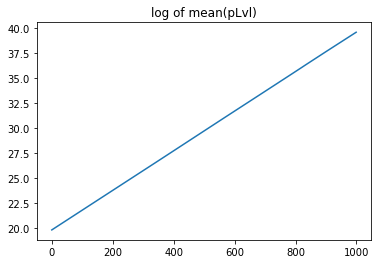


groFac_pLvl_cum: 1.01999


In [9]:
start_plots_at_period=1000
num_periods=len(pLvl_avg_lst[start_plots_at_period:])

groFac_pLvl_cum=(pLvl_avg_lst[-1]/pLvl_avg_lst[start_plots_at_period])**(1/num_periods)
plt.plot(np.log(pLvl_avg_lst[start_plots_at_period:]))
plt.title('log of mean(pLvl)')
makeFig('logpLvl') 

print('groFac_pLvl_cum: '+formatter.format(groFac_pLvl_cum))

# Plot of $\log \mathbf{\mathfrak{c}}_{t} (=\log \mathbb{M}[c_{t}])$ 


Saving figure logcNrm in ../../Figures


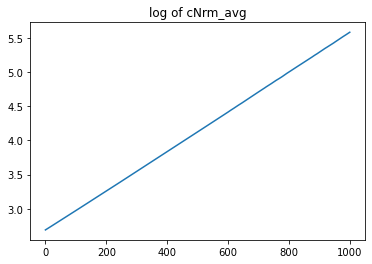


mean cNrm growth: 1.00289


In [10]:
groFac_cNrm_cum=(cNrm_avg_lst[-1]/cNrm_avg_lst[start_plots_at_period])**(1/num_periods)
plt.plot(np.log(cNrm_avg_lst[start_plots_at_period:]))
plt.title('log of cNrm_avg')
makeFig('logcNrm') 

print('mean cNrm growth: '+formatter.format(groFac_cNrm_cum))

# Plot of $\log \mathbf{C}_{t}$ 


Saving figure logcLvl in ../../Figures


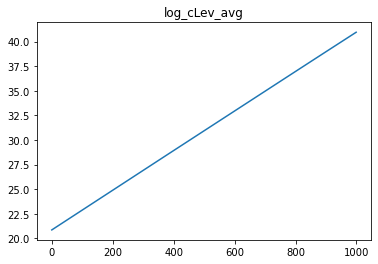


mean cLvl growth: 1.02030
mean cLvl growth/mean pLvl growth: 1.00031


In [11]:
groFac_cLvl_cum=(cLvl_avg_lst[-1]/cLvl_avg_lst[start_plots_at_period])**(1/num_periods)

plt.plot(np.log(cLvl_avg_lst[start_plots_at_period:]))
plt.title('log_cLvl_avg')
makeFig('logcLvl') 

print('mean cLvl growth: '+formatter.format(groFac_cLvl_cum))
print('mean cLvl growth/mean pLvl growth: '+
      formatter.format(groFac_cLvl_cum/groFac_pLvl_cum)
     )

# Plot of $\text{cov}_{t}(c_{t},\mathbf{p}_{t})(=\text{cov}_{t}(c_{t},p_{t})\mathbf{P}_{t})$ over time


Saving figure logcov in ../../Figures


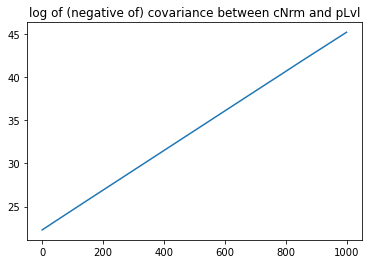


mean growth: 1.02314


In [12]:
#start_plots_at_period=1000
#num_periods=len(cNrm_pLvl_cov_lst[start_plots_at_period:])

groFac_cvar_cum=(cNrm_pLvl_cov_lst[-1]/cNrm_pLvl_cov_lst[start_plots_at_period])**(1/num_periods)

plt.plot(np.log(np.abs(cNrm_pLvl_cov_lst[start_plots_at_period:])))
plt.title('log of (negative of) covariance between cNrm and pLvl')
makeFig('logcov') 

print('mean growth: '+formatter.format(groFac_cvar_cum))


# Relation between cLvl growth, cov growth, and cNrm growth

<IPython.core.display.Latex object>

cumulative cLvl growth: 1.0203
cumulative pLvl growth: 1.0200


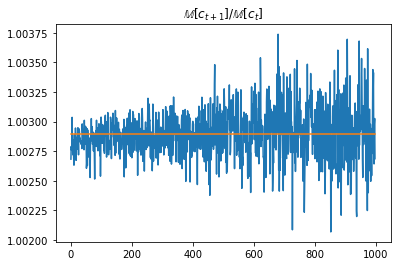

<IPython.core.display.Latex object>

cumulative cNrm growth: 1.0029


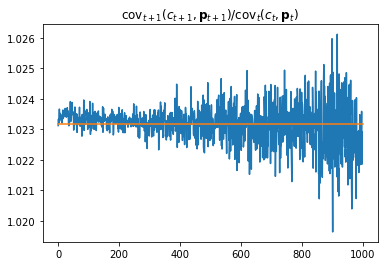

<IPython.core.display.Latex object>

cumulative cvar growth: 1.0231


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [110]:
groFac_cLvl_avg = []
groFac_pLvl_avg = []
groFac_cNrm_avg = []
groFac_cvar_avg = []

for i in range(len(cLvl_avg_lst) -1):
    groFac_cLvl_avg.append(cLvl_avg_lst[i+1]/cLvl_avg_lst[i])
    groFac_pLvl_avg.append(pLvl_avg_lst[i+1]/pLvl_avg_lst[i])
    groFac_cNrm_avg.append(cNrm_avg_lst[i+1]/cNrm_avg_lst[i])
    groFac_cvar_avg.append(cNrm_pLvl_cov_lst[i+1]/cNrm_pLvl_cov_lst[i])
    
# start_plots_at_period=500
# num_periods=len(groFac_cLvl_avg[start_plots_at_period:])
plt.plot(groFac_cLvl_avg[start_plots_at_period:])
plt.plot(np.mean(groFac_cLvl_avg[start_plots_at_period:])*np.ones(num_periods))
plt.title(r'$\mathbb{M}[{c}_{t+1}\mathbf{p}_{t+1}]/\mathbb{M}[c_{t} \mathbf{p}_{t}]$')
plt.show()
display(Latex(r"""
mean($\pmb{\mathfrak{c}}_{t+1}/\pmb{\mathfrak{c}}_{t}$) = """+
      formatter.format(np.mean(groFac_cLvl_avg[start_plots_at_period:]))))
print('cumulative cLvl growth: '+formatter.format(groFac_cLvl_cum))
print('cumulative pLvl growth: '+formatter.format(groFac_pLvl_cum))

plt.plot(groFac_cNrm_avg[start_plots_at_period:])
plt.plot(np.mean(groFac_cNrm_avg[start_plots_at_period:])*np.ones(num_periods))
plt.title(r'$\mathbb{M}[{c}_{t+1}]/\mathbb{M}[c_{t}]$')
plt.show()

display(Latex(r"""
mean($\mathbb{M}[c_{t+1}]/\mathbb{M}[c_{t}]$) = """+
      formatter.format(np.mean(groFac_cNrm_avg[start_plots_at_period:]))))
print('cumulative cNrm growth: '+formatter.format(groFac_cNrm_cum))

plt.plot(groFac_cvar_avg[start_plots_at_period:])
plt.plot(np.mean(groFac_cvar_avg[start_plots_at_period:])*np.ones(num_periods))
plt.title(r'cov$_{t+1}(c_{t+1},\mathbf{p}_{t+1}) / $cov$_{t}(c_{t}, \mathbf{p}_{t})$')
plt.show()

display(Latex(r"""
mean(cov$_{t+1}(c_{t+1},\mathbf{p}_{t+1}) / $cov$_{t}(c_{t}, \mathbf{p}_{t})$) = """+
      formatter.format(np.mean(groFac_cNrm_avg[start_plots_at_period:]))))
print('cumulative cvar growth: '+formatter.format(groFac_cvar_cum))

omega_cNrm = np.mean(groFac_cNrm_avg[start_plots_at_period:])
omega_cLvl = np.mean(groFac_cLvl_avg[start_plots_at_period:])
omega_pLvl = np.mean(groFac_pLvl_avg[start_plots_at_period:])
omega_cvar = np.mean(groFac_cvar_avg[start_plots_at_period:])

display(Latex("""$\mathbb{M}(\Omega_{\pmb{\mathfrak{c}}}) = $""" + formatter.format(omega_cNrm)))
display(Latex("""$\mathbb{M}(\Omega_{cov}) = $""" + formatter.format(omega_cvar)))
display(Latex("""$\mathbb{M}(\Omega_{cov}/\Omega_{\pmb{\mathfrak{c}}}) = $""" + formatter.format(omega_cvar/omega_cNrm)))
display(Latex("""$\mathbb{M}(\mathbf{p}_{t+1}/\mathbf{p}_{t}) = $"""+formatter.format(omega_pLvl)))